## **WARM UP**


In [81]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('/content/drive/MyDrive/Data/ONLINE EDUCATION SYSTEM REVIEW.csv')
print('number of NULL values in data:', df.isnull().sum().sum())
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
number of NULL values in data: 0


,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,Female,Rural,Under Graduate,19,3,Mobile,Middle Class,6,5,Yes,...,4,Yes,Yes,yes,91-100,4,4,Theory,8,Average
1029,Female,Rural,Under Graduate,20,6,Desktop,Middle Class,3,1,No,...,2,Yes,Yes,No,71-80,5,5,Theory,10,Average
1030,Female,Rural,Under Graduate,20,3,Mobile,Middle Class,3,2,No,...,3,No,Yes,yes,71-80,2,2,Theory,6,Average
1031,Female,Rural,Under Graduate,19,6,Mobile,Middle Class,2,3,Yes,...,2,Yes,No,No,61-70,3,3,Both,6,Good



# **STATISTICAL AND CATEGORITICAL ANALYSIS WITH IMPORTANT DATA FOR DISICION MAKING**
---



In [3]:
df.info()
df.describe().iloc[1:,:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online
mean,19.798645,7.03485,4.413359,3.586641,4.325266,6.947725,2.636980,2.930300,2.833495,6.696031
std,3.199158,2.81034,1.236750,1.026063,2.134233,1.324039,1.859625,1.105387,1.163629,1.920048
min,9.000000,1.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,18.000000,6.00000,4.000000,3.000000,3.000000,6.000000,1.000000,2.000000,2.000000,6.000000
50%,19.000000,7.00000,4.000000,4.000000,4.000000,7.000000,2.000000,3.000000,3.000000,7.000000
75%,20.000000,8.00000,5.000000,4.000000,6.000000,8.000000,3.000000,4.000000,4.000000,8.000000
max,40.000000,20.00000,10.000000,5.000000,10.000000,10.000000,10.000000,5.000000,5.000000,10.000000


Female ratio among all people is :  40.56 %
Male ratio among all people is :  59.44 %

People living in Rural areas are  34.27 % of all people.
People living in Urban areas are  65.73 % of all people.

The pecentages of the used devices are : 
Laptop :  65.05 %
Mobile :  32.33 %
PC :  2.61 %


Avg : 52.37 %
Good : 24.3 %
Bad : 23.33 %


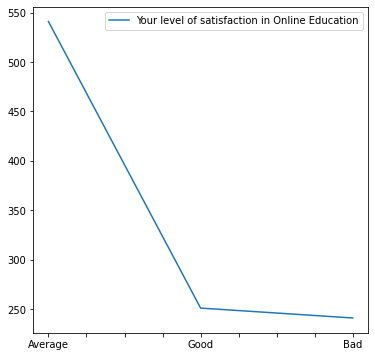

In [47]:
v = pd.DataFrame(df[['Gender', 'Your level of satisfaction in Online Education']]).value_counts()
#print(v)
#male & female analysis
x = df.Gender.value_counts()
x1 = round(x[1]/(x[0]+x[1])*100, 2)
x2 = round(x[0]/(x[0]+x[1])*100, 2)
print("Female ratio among all people is : ", x1, "%")
print("Male ratio among all people is : ", x2, "%\n")

#home location analysis
y = df["Home Location"].value_counts()
y1 = round(y[1]/(y[0]+y[1])*100, 2)
y2 = round(y[0]/(y[0]+y[1])*100, 2)
print("People living in Rural areas are ", y1, "% of all people.")
print("People living in Urban areas are ", y2, "% of all people.")

#used devices analysis
z = df["Device type used to attend classes"].value_counts()
ztot = z[0]+z[1]+z[2]
z1 = round(z[0]/ztot*100, 2)
z2 = round(z[1]/ztot*100, 2)
z3 = round(z[2]/ztot*100, 2)
print("\nThe pecentages of the used devices are : ")
print("Laptop : ", z1, "%")
print("Mobile : ", z2, "%")
print("PC : ", z3, "%\n")

print("")
f = round(df["Your level of satisfaction in Online Education"].value_counts()/1033*100,2)
print("Avg :", f[0], "%")
print("Good :", f[1], "%")
print("Bad :", f[2], "%")
pd.DataFrame(df["Your level of satisfaction in Online Education"].value_counts()).plot(figsize=(6,6))
plt.show()

Engaged in group studies?  Your level of satisfaction in Online Education
No                         Average                                           327
yes                        Average                                           214
No                         Bad                                               152
                           Good                                              137
yes                        Good                                              114
                           Bad                                                89
dtype: int64


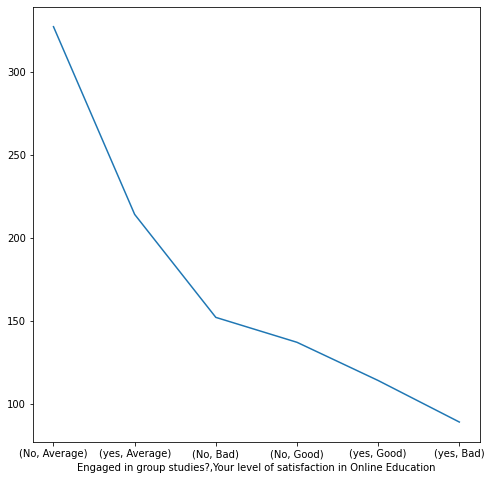

In [48]:
engagement_satisfaction = pd.DataFrame(df[['Engaged in group studies?', 'Your level of satisfaction in Online Education']]).value_counts()
print(engagement_satisfaction)
engagement_satisfaction.plot(figsize=(8,8))
plt.show()

Interested in Gaming?  Your level of satisfaction in Online Education
Yes                    Average                                           285
No                     Average                                           256
Yes                    Good                                              141
                       Bad                                               134
No                     Good                                              110
                       Bad                                               107
dtype: int64


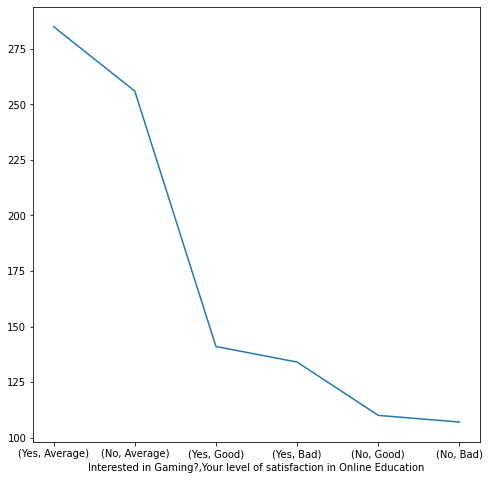

In [45]:
Gaming_satisfaction = pd.DataFrame(df[['Interested in Gaming?', 'Your level of satisfaction in Online Education']]).value_counts()
print(Gaming_satisfaction)
Gaming_satisfaction.plot(figsize=(8,8))
plt.show()

Have separate room for studying?  Your level of satisfaction in Online Education
Yes                               Average                                           319
No                                Average                                           222
Yes                               Good                                              151
                                  Bad                                               138
No                                Bad                                               103
                                  Good                                              100
dtype: int64


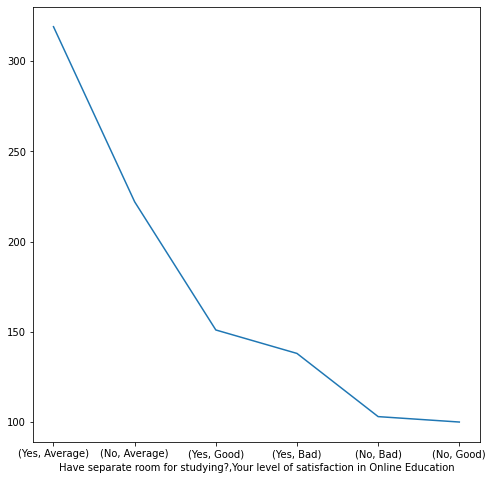

In [49]:
test = pd.DataFrame(df[['Have separate room for studying?', 'Your level of satisfaction in Online Education']]).value_counts()
print(test)
test.plot(figsize=(8,8))
plt.show()

Are you involved in any sports?  Your level of satisfaction in Online Education
No                               Average                                           356
Yes                              Average                                           185
No                               Good                                              166
                                 Bad                                               141
Yes                              Bad                                               100
                                 Good                                               85
dtype: int64


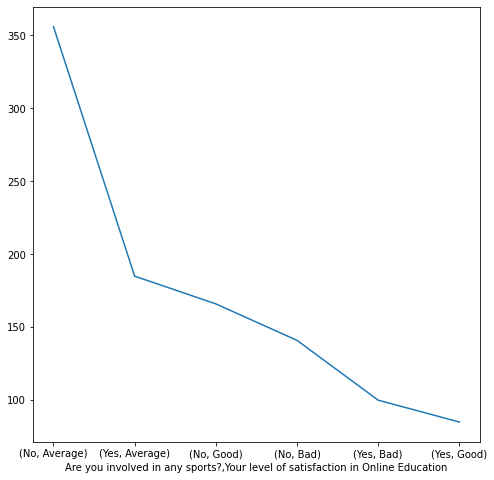

In [50]:

test = pd.DataFrame(df[['Are you involved in any sports?', 'Your level of satisfaction in Online Education']]).value_counts()
print(test)
test.plot(figsize=(8,8))
plt.show()

Do elderly people monitor you?  Your level of satisfaction in Online Education
Yes                             Average                                           291
No                              Average                                           250
Yes                             Good                                              140
No                              Bad                                               127
Yes                             Bad                                               114
No                              Good                                              111
dtype: int64
Do elderly people monitor you?  Your level of satisfaction in Online Education
Yes                             Average                                           291
No                              Average                                           250
Yes                             Good                                              140
No                              Bad                    

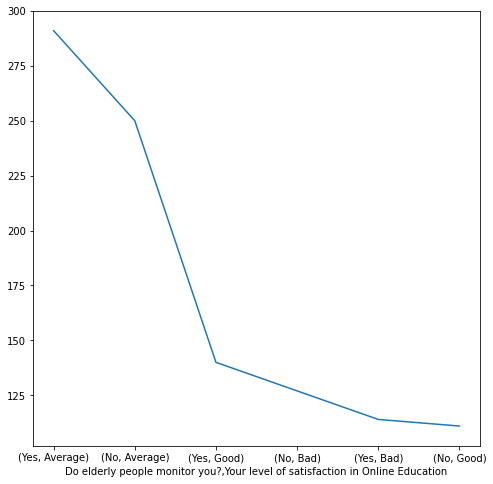

In [51]:
test = pd.DataFrame(df[['Do elderly people monitor you?', 'Your level of satisfaction in Online Education']]).value_counts()
print(test)
print(test)
test.plot(figsize=(8,8))
plt.show()

In [67]:
print(df[['Your interaction in online mode', 'Your level of satisfaction in Online Education']][(df['Your interaction in online mode'] < 3)].value_counts().to_string(),"\n")
print(df[['Your interaction in online mode', 'Your level of satisfaction in Online Education']][(df['Your interaction in online mode'] > 3)].value_counts().to_string())


Your interaction in online mode  Your level of satisfaction in Online Education
2                                Average                                           100
1                                Bad                                                86
2                                Bad                                                74
1                                Average                                            34
2                                Good                                               15
1                                Good                                                9 

Your interaction in online mode  Your level of satisfaction in Online Education
4                                Average                                           99
                                 Good                                              76
5                                Good                                              68
                                 Average                  

In [12]:
satisfaction_Internet = df[['Your level of satisfaction in Online Education', 'Internet facility in your locality']][(df['Internet facility in your locality'] <3 )].value_counts()
not_satisfied_bad_internet = satisfaction_Internet[1] + satisfaction_Internet[3]
satisfied_bad_internet = satisfaction_Internet[2] + satisfaction_Internet[5]
print("\npeople who have bad internet facility are ("  , round(not_satisfied_bad_internet/satisfied_bad_internet,2) ,  ") times less likely to be satisfied with online education\n")
print(
  """So, we must provide better internet facilities in order to improve satisfaction \n"""
)


people who have bad internet facility are ( 1.87 ) times less likely to be satisfied with online education

So, we must provide better internet facilities in order to improve satisfaction 



Gender  Your level of satisfaction in Online Education
Male    Good                                              22
Female  Good                                              27 

Gender  Your level of satisfaction in Online Education
Male    Average                                           50
Female  Average                                           55 

Gender  Your level of satisfaction in Online Education
Male    Bad                                               27
Female  Bad                                               16


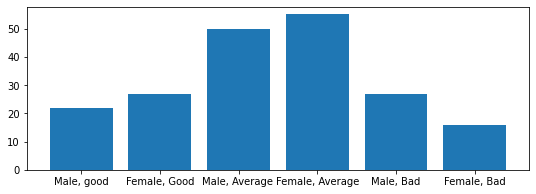

In [82]:
g1 = df.Gender.value_counts()
satisfaction_Home = df[['Gender', 'Your level of satisfaction in Online Education']][(df['Your level of satisfaction in Online Education'] == "Good" )].value_counts()
satisfaction_Home[0] = 100*satisfaction_Home[0]/g1[0]
satisfaction_Home[1] = 100*satisfaction_Home[1]/g1[1]
print(satisfaction_Home.to_string(),"\n")
satisfaction_Home1 = df[['Gender', 'Your level of satisfaction in Online Education']][(df['Your level of satisfaction in Online Education'] == "Average" )].value_counts()
satisfaction_Home1[0] = 100*satisfaction_Home1[0]/g1[0]
satisfaction_Home1[1] = 100*satisfaction_Home1[1]/g1[1]
print(satisfaction_Home1.to_string(),"\n")
satisfaction_Home2 = df[['Gender', 'Your level of satisfaction in Online Education']][(df['Your level of satisfaction in Online Education'] == "Bad" )].value_counts()
satisfaction_Home2[0] = 100*satisfaction_Home2[0]/g1[0]
satisfaction_Home2[1] = 100*satisfaction_Home2[1]/g1[1]
print(satisfaction_Home2.to_string(),)

import matplotlib.pyplot as pl

data = {'Male, good': 22, 'Female, Good': 27, 'Male, Average ': 50, 'Female, Average': 55, 'Male, Bad':27, 'Female, Bad':16}
names = list(data.keys())
values = list(data.values())

fig, axs = pl.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.bar(names, values)
pl.show()

Your level of satisfaction in Online Education  Home Location
Average                                         Rural            184
Good                                            Rural            104
Bad                                             Rural             66
dtype: int64

 Your level of satisfaction in Online Education  Home Location
Average                                         Urban            357
Bad                                             Urban            175
Good                                            Urban            147
dtype: int64


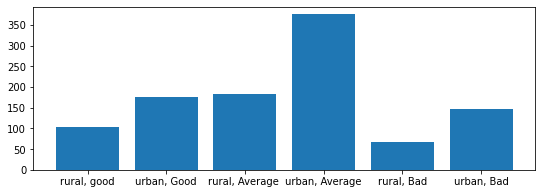

In [85]:
print(df[['Your level of satisfaction in Online Education', 'Home Location']][(df['Home Location'] == 'Rural' )].value_counts())

print("\n",df[['Your level of satisfaction in Online Education', 'Home Location']][(df['Home Location'] == 'Urban' )].value_counts())
data = {'rural, good': 104, 'urban, Good': 175, 'rural, Average ': 184, 'urban, Average': 375, 'rural, Bad':66, 'urban, Bad':147}
names = list(data.keys())
values = list(data.values())

fig, axs = pl.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.bar(names, values)
pl.show()

In [15]:
engagement_satisfaction = pd.DataFrame(df[['Engaged in group studies?', 'Your level of satisfaction in Online Education']]).value_counts()
not_engaged_bad_experience = engagement_satisfaction[2]/1033*100
engaged_bad_experience = engagement_satisfaction[5]/1033*100
#print(engagement_satisfaction)
print("participants who aren't engaged in studying groups had a significantly worse experience with online education than those who are,")
print("the percentage of people who who aren't engaged in studying group and had a bad experience is :", round(not_engaged_bad_experience,2), "%") 
print("the percentage of people who who are engaged in studying group and had a bad experience is :", round(engaged_bad_experience,2), "%")
print("So participants are (", round(not_engaged_bad_experience/engaged_bad_experience,2),") times more likely to be unsatisfied if they are not engaged in studying groups")

participants who aren't engaged in studying groups had a significantly worse experience with online education than those who are,
the percentage of people who who aren't engaged in studying group and had a bad experience is : 14.71 %
the percentage of people who who are engaged in studying group and had a bad experience is : 8.62 %
So participants are ( 1.71 ) times more likely to be unsatisfied if they are not engaged in studying groups


# **ENCODING**

In [16]:
dd = df.copy()
cols = [i for i in df if type(df[i][0]) == type('')]
x = dd
x = x.iloc[:,:].values
le = preprocessing.LabelEncoder()
encoded = dd
all_col = list(dd.columns)
for col in cols:
  series = (pd.DataFrame(le.fit_transform(x[:,all_col.index(col)])))
  
  encoded[col] = series
encoded

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,1,1,2,18,11,1,0,4,5,0,...,1,0,0,0,9,1,1,1,6,0
1,1,1,2,19,7,1,0,4,1,1,...,1,1,1,0,9,1,1,2,3,1
2,1,0,2,18,5,1,0,5,2,0,...,1,0,1,0,7,1,1,0,6,1
3,1,1,2,18,5,1,0,4,4,1,...,2,0,0,1,9,1,2,2,4,1
4,1,0,2,18,5,1,0,4,3,0,...,2,1,1,1,8,3,3,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0,0,2,19,3,2,0,6,5,1,...,4,1,1,1,9,4,4,2,8,0
1029,0,0,2,20,6,0,0,3,1,0,...,2,1,1,0,7,5,5,2,10,0
1030,0,0,2,20,3,2,0,3,2,0,...,3,0,1,1,7,2,2,2,6,0
1031,0,0,2,19,6,2,0,2,3,1,...,2,1,0,0,6,3,3,0,6,2


# **SCALING**

In [17]:
standard_data = encoded.copy()
standard_data.iloc[:,:-1] = preprocessing.scale(encoded.iloc[:,:-1])
print(standard_data.mean()) 
print(standard_data.std())
#the sum is almost zero
print(standard_data.iloc[:,:-1].sum().sum())
standard_data



Gender                                                           5.502751e-17
Home Location                                                   -9.629814e-17
Level of Education                                               9.973736e-17
Age(Years)                                                       4.952476e-16
Number of Subjects                                               3.439219e-17
Device type used to attend classes                               6.878439e-17
Economic status                                                  5.502751e-17
Family size                                                     -3.267258e-16
Internet facility in your locality                              -2.751376e-17
Are you involved in any sports?                                 -3.439219e-18
Do elderly people monitor you?                                   7.222361e-17
Study time (Hours)                                               1.771198e-16
Sleep time (Hours)                                              

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,0.826081,0.722049,0.486024,-0.562497,1.411598,-0.581565,-0.270233,-0.334392,1.378125,-0.747040,...,-0.880700,-1.088087,-1.196072,-0.822769,1.244915,-1.747111,-1.576433,0.128714,-0.362683,0
1,0.826081,0.722049,0.486024,-0.249763,-0.012407,-0.581565,-0.270233,-0.334392,-2.522158,1.338616,...,-0.880700,0.919045,0.836070,-0.822769,1.244915,-1.747111,-1.576433,1.458326,-1.925901,1
2,0.826081,-1.384947,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,0.474571,-1.547087,-0.747040,...,-0.880700,-1.088087,0.836070,-0.822769,-0.165943,-1.747111,-1.576433,-1.200899,-0.362683,1
3,0.826081,0.722049,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,-0.334392,0.403054,1.338616,...,-0.342697,-1.088087,-1.196072,1.215409,1.244915,-1.747111,-0.716636,1.458326,-1.404828,1
4,0.826081,-1.384947,0.486024,-0.562497,-0.724409,-0.581565,-0.270233,-0.334392,-0.572016,-0.747040,...,-0.342697,0.919045,0.836070,1.215409,0.539486,0.063085,0.143161,-1.200899,-0.362683,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,-1.210535,-1.384947,0.486024,-0.249763,-1.436412,1.375296,-0.270233,1.283533,1.378125,1.338616,...,0.733309,0.919045,0.836070,1.215409,1.244915,0.968184,1.002958,1.458326,0.679463,0
1029,-1.210535,-1.384947,0.486024,0.062971,-0.368408,-2.538425,-0.270233,-1.143355,-2.522158,-0.747040,...,-0.342697,0.919045,0.836070,-0.822769,-0.165943,1.873282,1.862754,1.458326,1.721608,0
1030,-1.210535,-1.384947,0.486024,0.062971,-1.436412,1.375296,-0.270233,-1.143355,-1.547087,-0.747040,...,0.195306,-1.088087,0.836070,1.215409,-0.165943,-0.842013,-0.716636,1.458326,-0.362683,0
1031,-1.210535,-1.384947,0.486024,-0.249763,-0.368408,1.375296,-0.270233,-1.952317,-0.572016,1.338616,...,-0.342697,0.919045,-1.196072,-0.822769,-0.871373,0.063085,0.143161,-1.200899,-0.362683,2


# **NORMALIZATION**

In [18]:
dd = encoded.copy()
norm_df = pd.DataFrame()
ar = list(dd.columns)
for col_name in ar[:-1]:
        max_value = dd[col_name].max()
        min_value = dd[col_name].min()
        if max_value > min_value:
            norm_df[col_name] = (dd[col_name] - min_value) / (max_value - min_value)
norm_df[ar[-1]] = dd[ar[-1]]
norm_df

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,1.0,1.0,1.0,0.290323,0.526316,0.5,0.0,0.250,1.00,0.0,...,0.000000,0.0,0.0,0.0,1.000000,0.00,0.00,0.5,0.500,0
1,1.0,1.0,1.0,0.322581,0.315789,0.5,0.0,0.250,0.00,1.0,...,0.000000,1.0,1.0,0.0,1.000000,0.00,0.00,1.0,0.125,1
2,1.0,0.0,1.0,0.290323,0.210526,0.5,0.0,0.375,0.25,0.0,...,0.000000,0.0,1.0,0.0,0.777778,0.00,0.00,0.0,0.500,1
3,1.0,1.0,1.0,0.290323,0.210526,0.5,0.0,0.250,0.75,1.0,...,0.111111,0.0,0.0,1.0,1.000000,0.00,0.25,1.0,0.250,1
4,1.0,0.0,1.0,0.290323,0.210526,0.5,0.0,0.250,0.50,0.0,...,0.111111,1.0,1.0,1.0,0.888889,0.50,0.50,0.0,0.500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,0.0,0.0,1.0,0.322581,0.105263,1.0,0.0,0.500,1.00,1.0,...,0.333333,1.0,1.0,1.0,1.000000,0.75,0.75,1.0,0.750,0
1029,0.0,0.0,1.0,0.354839,0.263158,0.0,0.0,0.125,0.00,0.0,...,0.111111,1.0,1.0,0.0,0.777778,1.00,1.00,1.0,1.000,0
1030,0.0,0.0,1.0,0.354839,0.105263,1.0,0.0,0.125,0.25,0.0,...,0.222222,0.0,1.0,1.0,0.777778,0.25,0.25,1.0,0.500,0
1031,0.0,0.0,1.0,0.322581,0.263158,1.0,0.0,0.000,0.50,1.0,...,0.111111,1.0,0.0,0.0,0.666667,0.50,0.50,0.0,0.500,2


# **ML**

In [35]:
path = int(input('please enter 1 for scaled data or 2 for nomalized data: '))
arr = [standard_data, norm_df]
x = arr[path-1].iloc[:, :-1].copy()
y = arr[path-1].iloc[:,-1].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=9)
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


print("SVM :")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))


please enter 1 for scaled data or 2 for nomalized data: 1
SVM :
Accuracy: 0.7
Confusion Matrix :
 [[151   8  15]
 [ 34  30   0]
 [ 35   1  36]]
